<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from yellowbrick.cluster import KElbowVisualizer
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN        
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
data = pd.read_csv('./data/Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


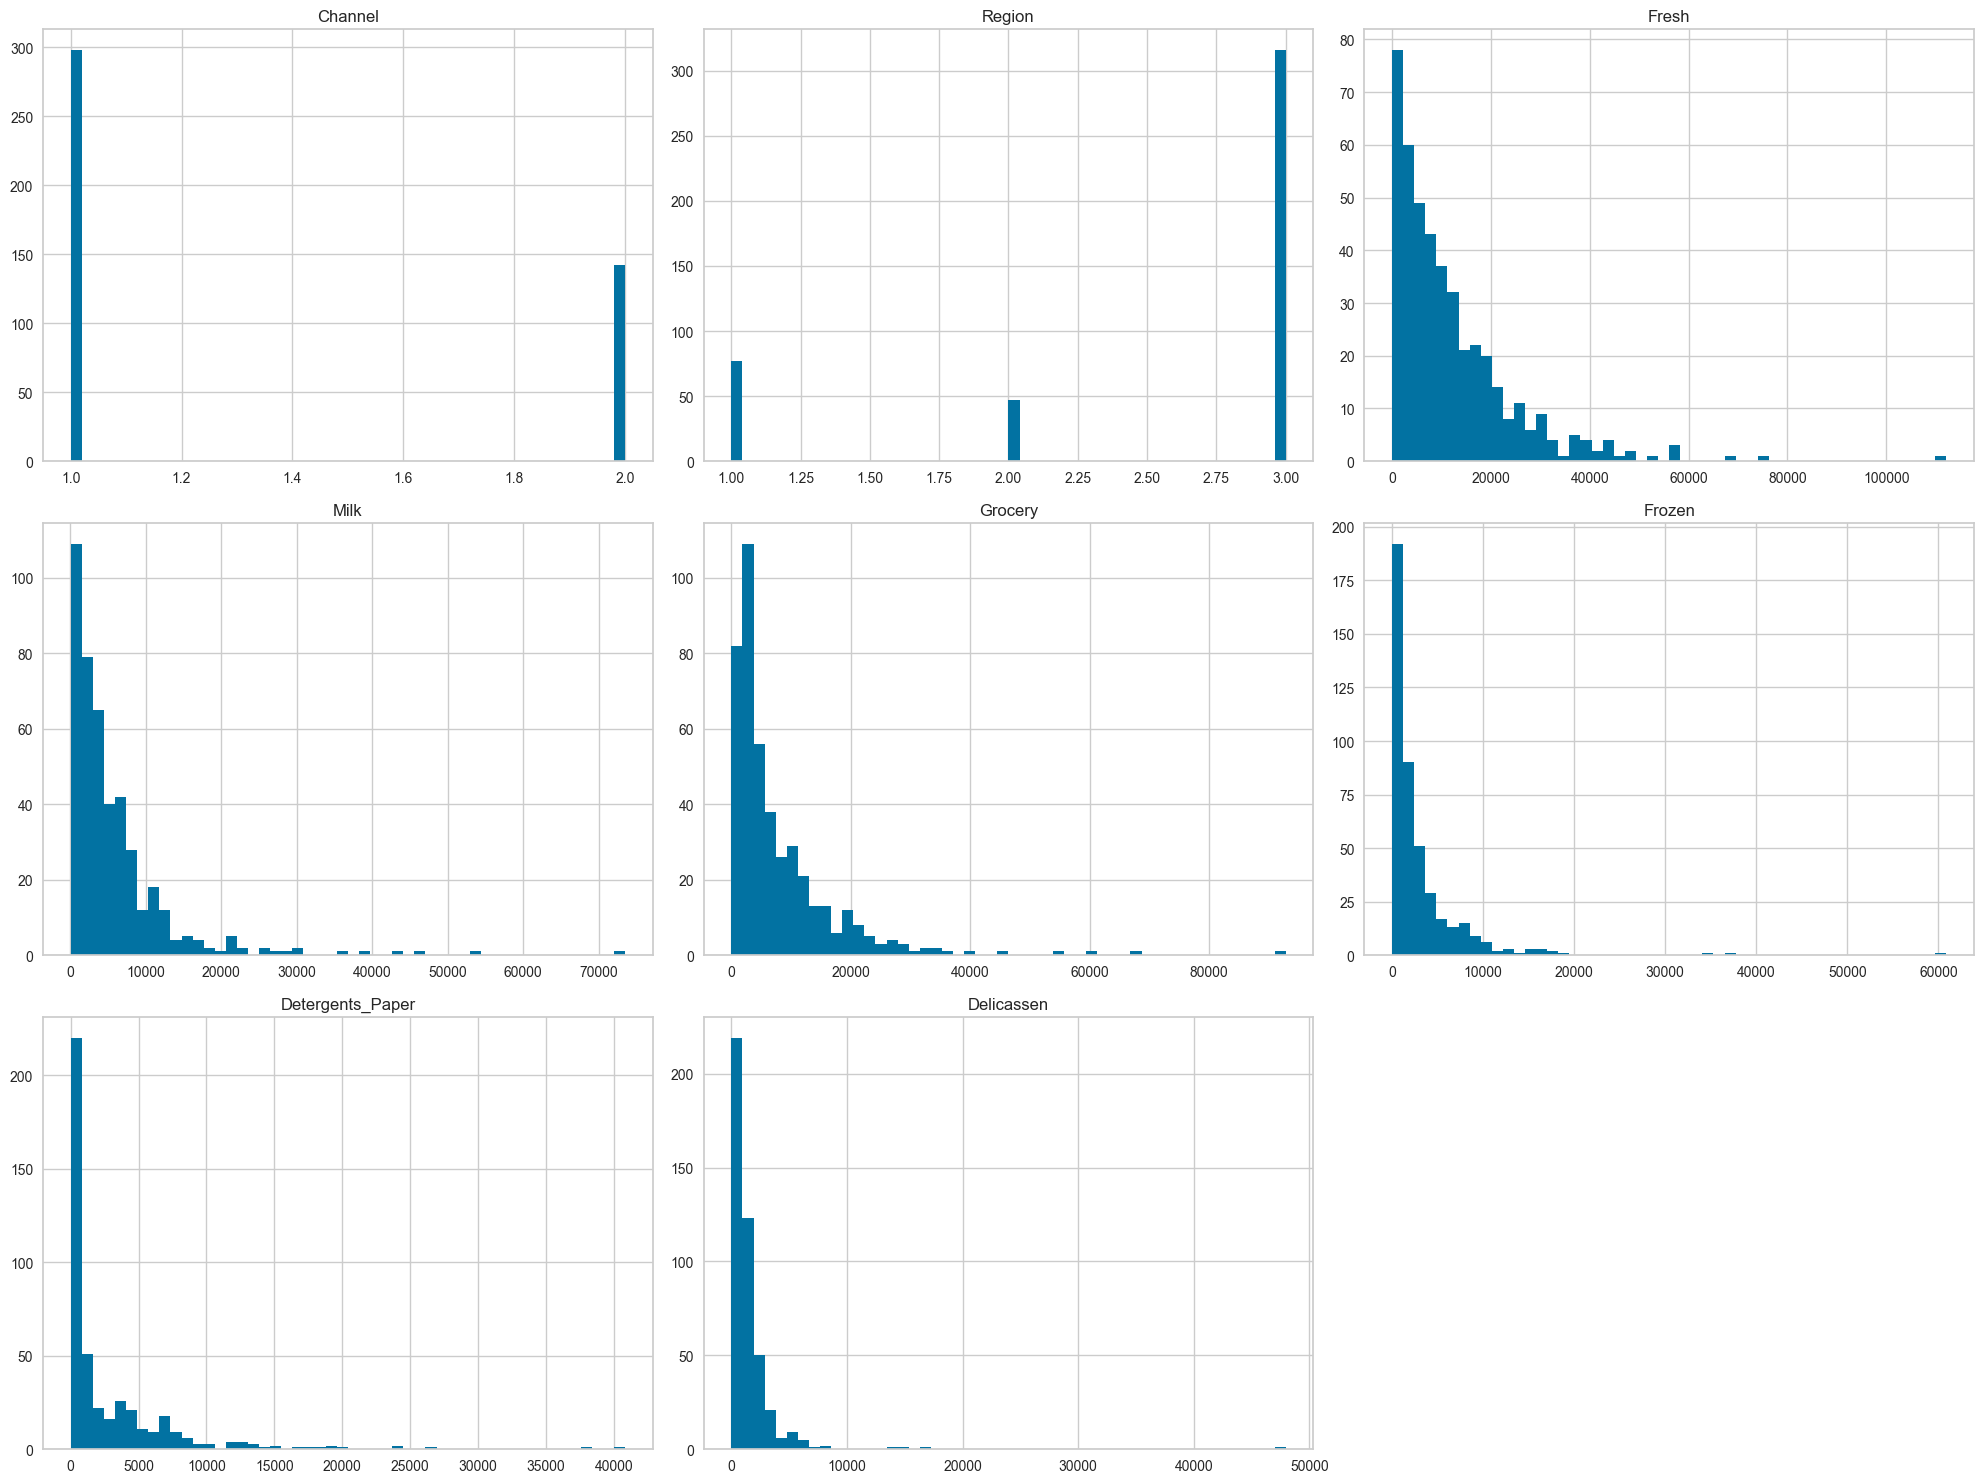

In [5]:
data.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

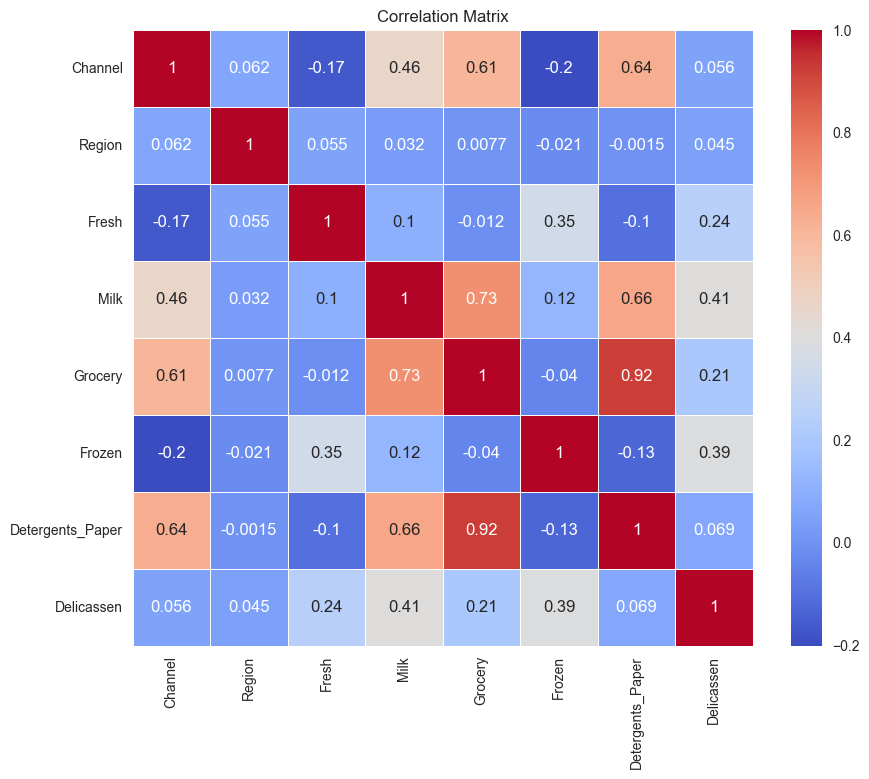

In [6]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Your observations here

* What does each column mean?
  * Fresh: annual spending on fresh products
  * Milk: annual spending on milk products
  * Grocery: annual spending on grocery products
  * Frozen: annual spending on frozen products
  * Detergents_Paper: annual spending on detergents and paper products
  * Delicassen: annual spending on delicatessen products
  * Channel: customer channel (Horeca = Hotel/Restaurant/Cafe, Retail = Retail channel)
  * Region: customer region (Lisbon, Oporto, Other)

* Any categorical data to convert?
  * Channel and Region are categorical columns.

* Any missing data to remove?
  * There are no missing values in the dataset.

* Column collinearity - any high correlations?
  * High correlation between Grocery and Detergents_Paper columns.

* Descriptive statistics - any outliers to remove?
  * There are potential outliers in the Fresh, Milk, and Grocery columns.

* Column-wise data distribution - is the distribution skewed?
  * Data distributions are all skewed.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

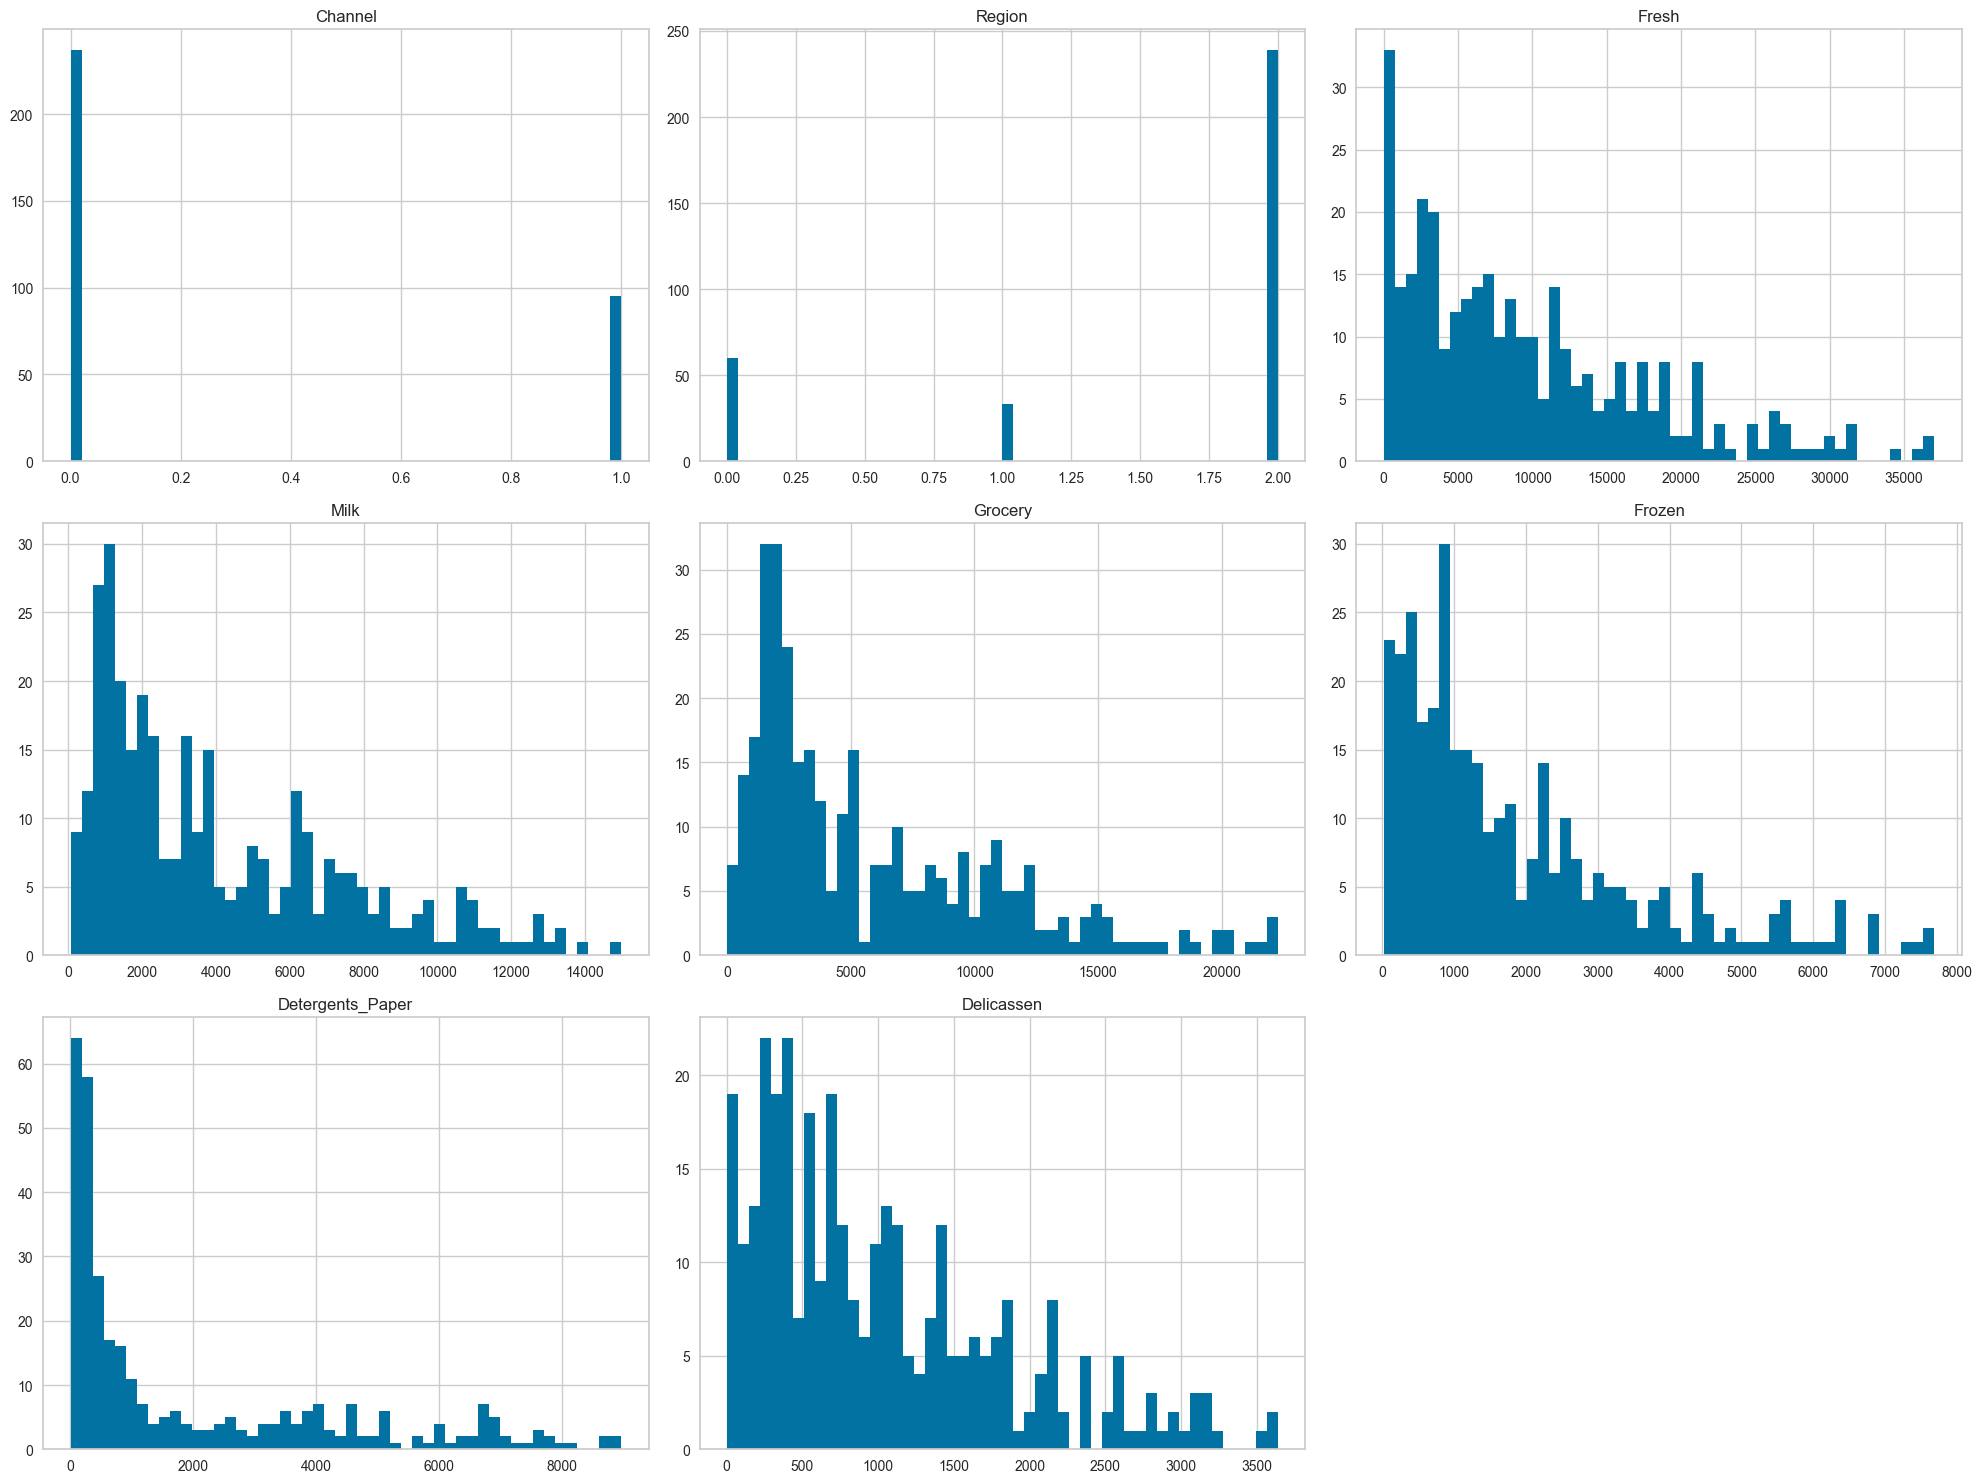

In [7]:
# Encoding categorical data
data['Channel'] = data['Channel'].astype('category').cat.codes
data['Region'] = data['Region'].astype('category').cat.codes

# Remove outliers using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Log transformation to reduce skewness - Removed to avoid weird results
# data_log = np.log1p(data)

data.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

### Your comment here

* Categorical columns have been encoded.
* Outliers have been removed using the IQR method.

### Thank you ChatGPT

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [8]:
scaler = StandardScaler()
customers_scale = scaler.fit_transform(data)
customers_scale = pd.DataFrame(customers_scale, columns=data.columns)

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

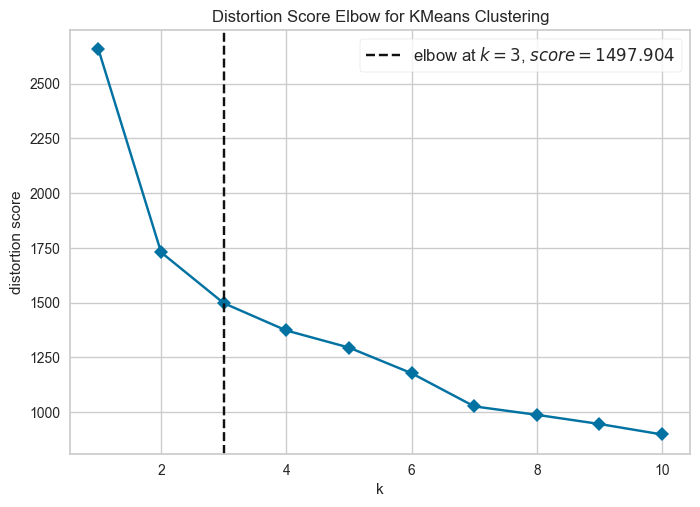

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,11), timings=False)
visualizer.fit(customers_scale)    
visualizer.show()

### Looking to the elbow we can choose 2 like the correct number of clusters

In [10]:
kmeans_2 = KMeans(n_clusters=2, random_state=42).fit(customers_scale)
customers_scale['Label_KMEANS'] = kmeans_2.labels_

Count the values in `labels`.

In [11]:
# Your code here:
customers_scale['Label_KMEANS'].value_counts()

1    233
0     99
Name: Label_KMEANS, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [12]:
dbscan = DBSCAN(eps=0.5)
dbscan.fit(customers_scale)
customers_scale['Label_DBSCAN'] = dbscan.labels_

Count the values in `labels_DBSCAN`.

In [13]:
customers_scale['Label_DBSCAN'].value_counts()

-1    308
 0     24
Name: Label_DBSCAN, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

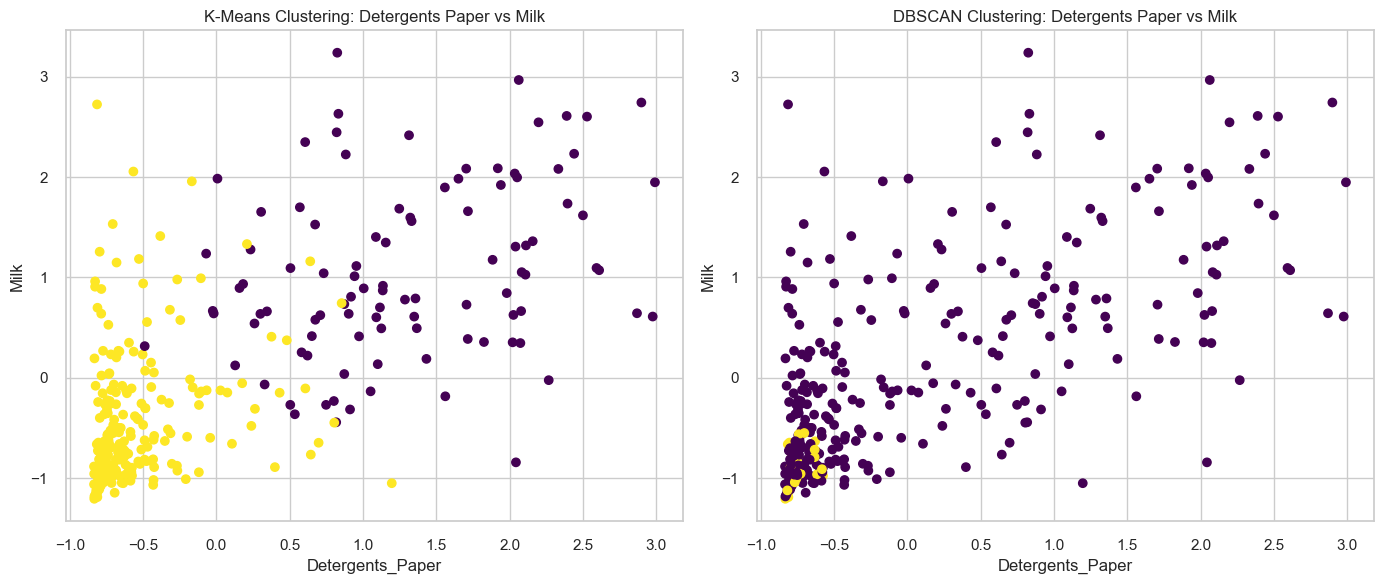

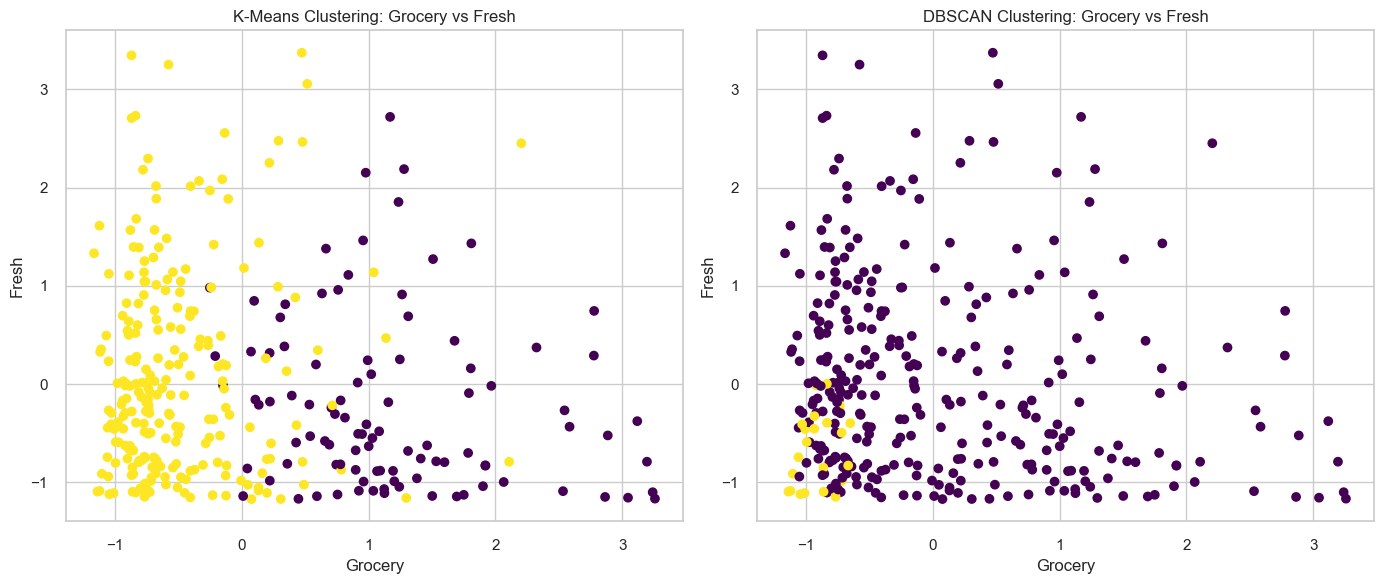

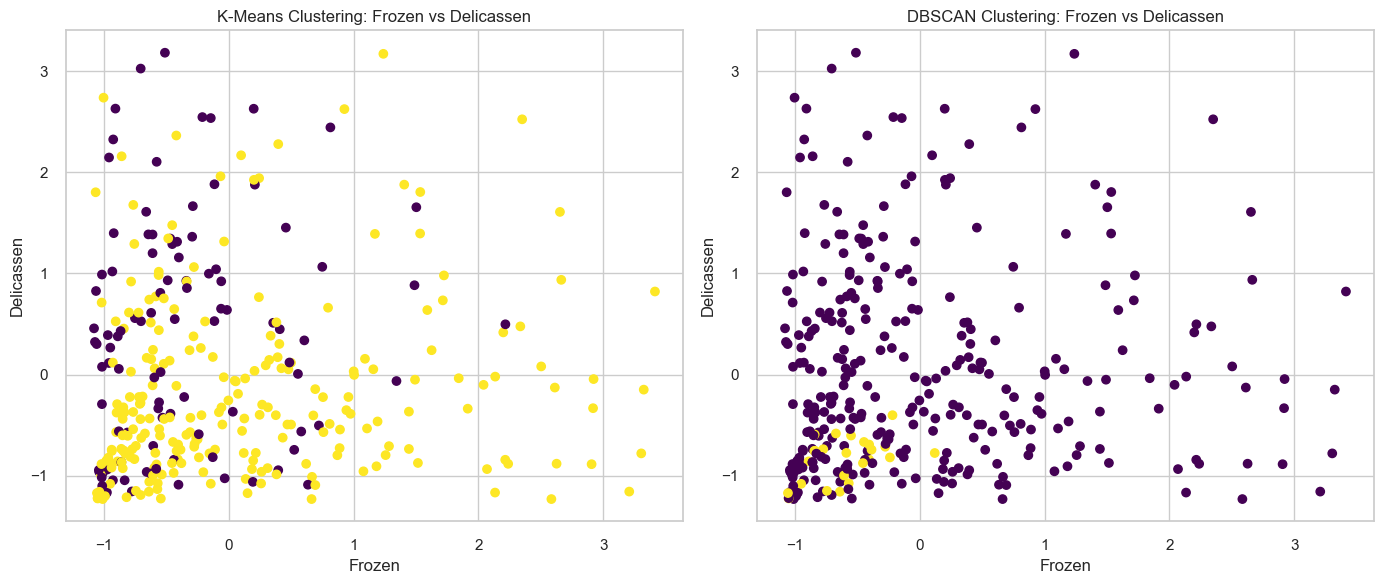

In [14]:
# Set a seaborn style
sns.set(style="whitegrid")

# Define the column pairs
column_pairs = [
    ('Detergents_Paper', 'Milk', 'Detergents Paper vs Milk'),
    ('Grocery', 'Fresh', 'Grocery vs Fresh'),
    ('Frozen', 'Delicassen', 'Frozen vs Delicassen')
]

# Define a colormap
cmap = plt.get_cmap('viridis')

for x_col, y_col, title in column_pairs:
    plt.figure(figsize=(14, 6))

    # K-Means plot
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(customers_scale[x_col], customers_scale[y_col], c=customers_scale['Label_KMEANS'], cmap=cmap)
    plt.title(f'K-Means Clustering: {title}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    # DBSCAN plot
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(customers_scale[x_col], customers_scale[y_col], c=customers_scale['Label_DBSCAN'], cmap=cmap)
    plt.title(f'DBSCAN Clustering: {title}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    plt.tight_layout()
    plt.show()


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [15]:
kmeans_grouped = customers_scale.groupby('Label_KMEANS').mean()
dbscan_grouped = customers_scale.groupby('Label_DBSCAN').mean()

print("K-Means Grouped Means:")
print(kmeans_grouped)

print("\nDBSCAN Grouped Means:")
print(dbscan_grouped)

K-Means Grouped Means:
               Channel    Region     Fresh      Milk   Grocery    Frozen  \
Label_KMEANS                                                               
0             1.400678  0.176206 -0.223130  1.057528  1.192693 -0.355761   
1            -0.595138 -0.074868  0.094806 -0.449336 -0.506767  0.151160   

              Detergents_Paper  Delicassen  Label_DBSCAN  
Label_KMEANS                                              
0                     1.304035    0.392613     -1.000000  
1                    -0.554075   -0.166818     -0.896996  

DBSCAN Grouped Means:
               Channel    Region     Fresh      Milk   Grocery    Frozen  \
Label_DBSCAN                                                               
-1            0.049334 -0.045981  0.049747  0.069165  0.069132  0.046433   
 0           -0.633122  0.590092 -0.638414 -0.887623 -0.887188 -0.595885   

              Detergents_Paper  Delicassen  Label_KMEANS  
Label_DBSCAN                                     

Which algorithm appears to perform better?

* K-Means appears to perform better in this case because it provides clearer and more interpretable clusters with distinct spending patterns.
* DBSCAN results in a large number of noise points. But it's most likely because of the EPS value & the min_samples, I didn't play with them before because I saw there was a bonus challenge below

**Your observations here**

All the 0s in DBScan are 1s in KMeans, so algorithms seem to agree on something

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

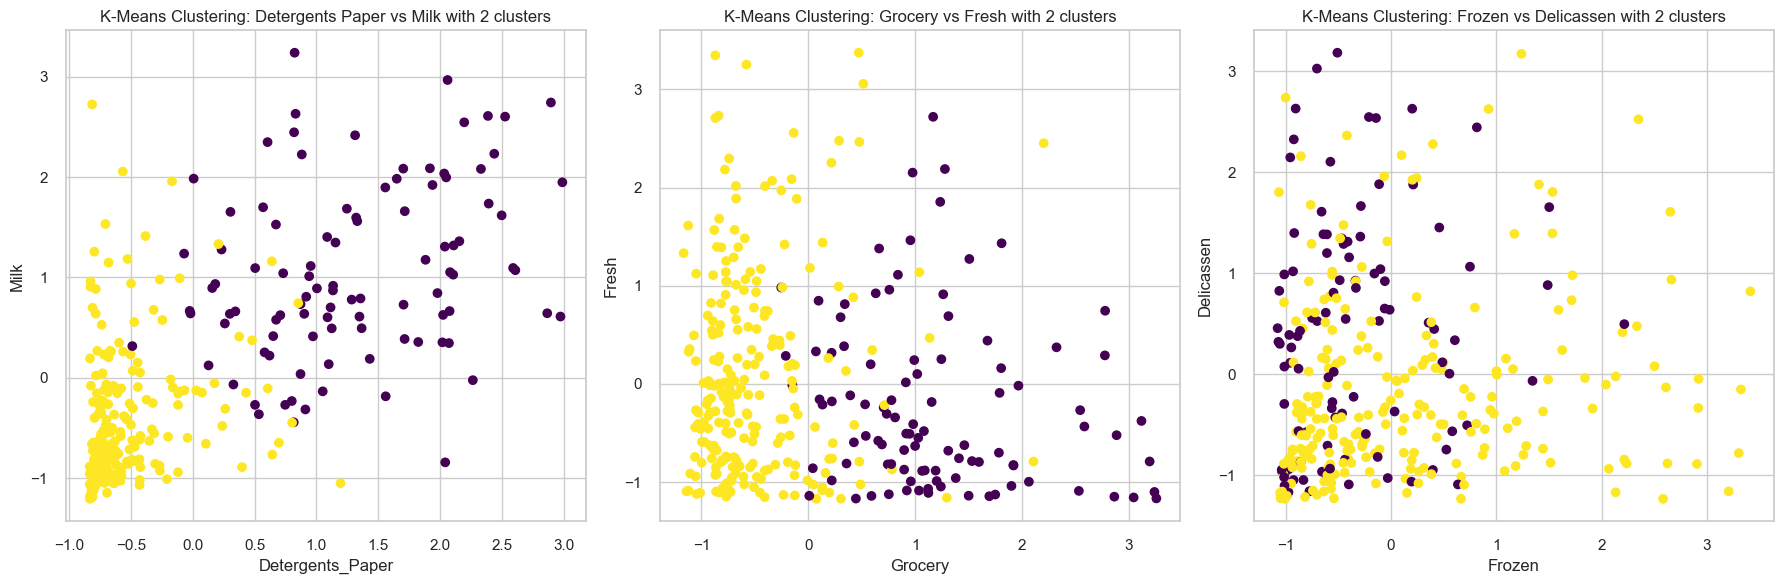

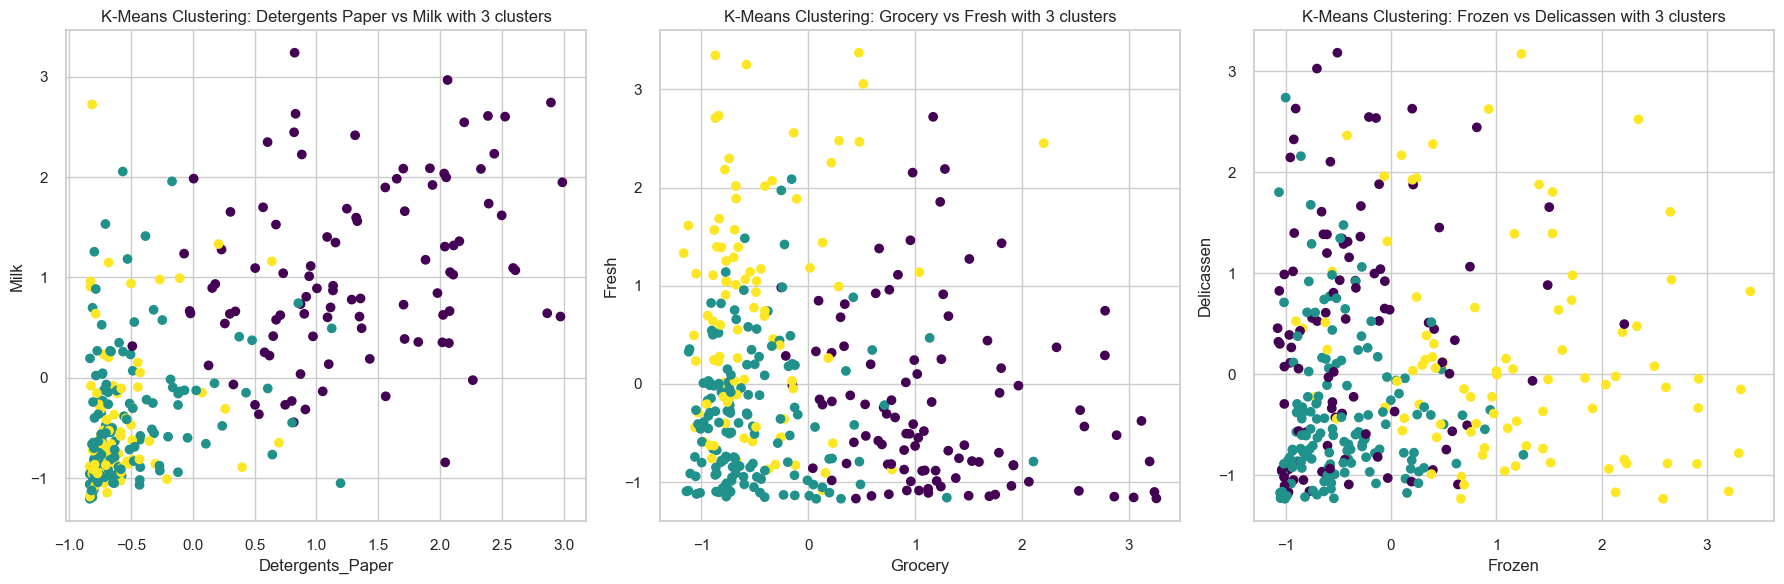

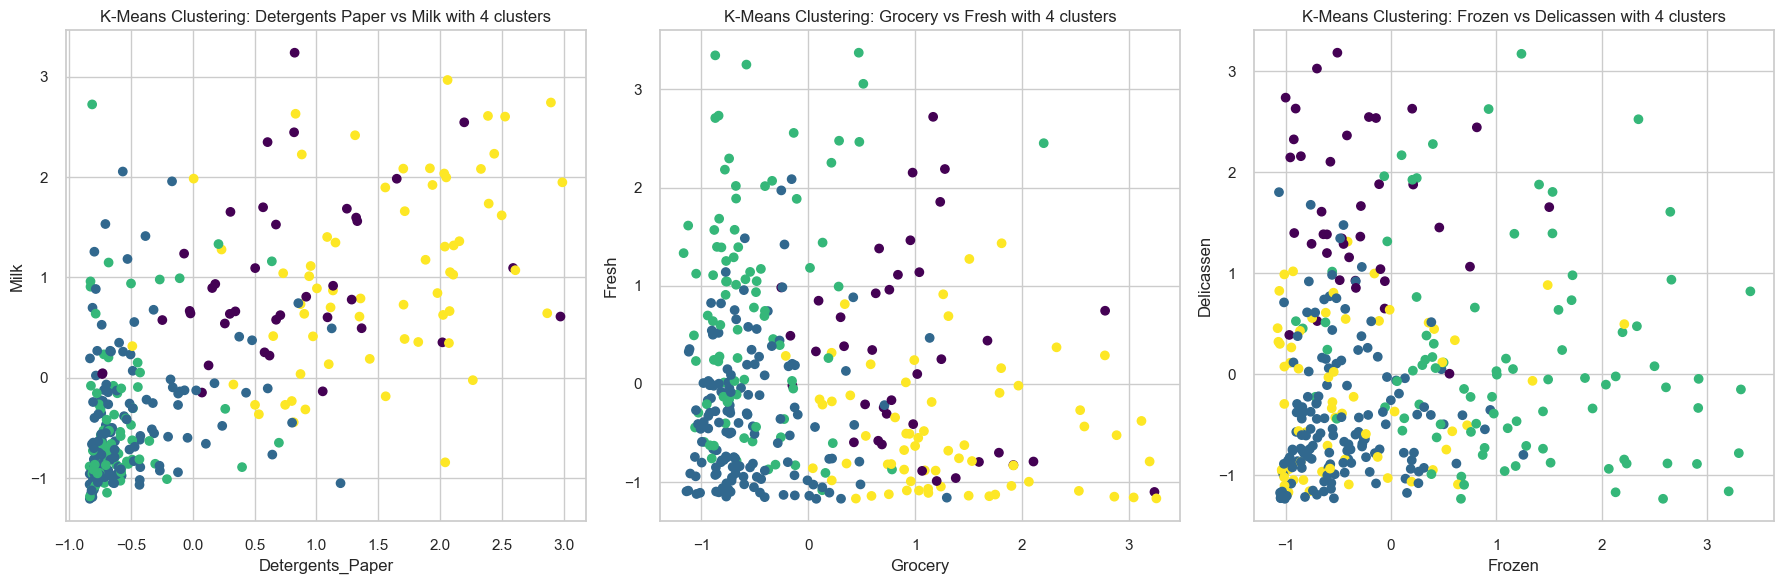

In [16]:
for n_clusters in [2, 3, 4]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(customers_scale)
    customers_scale['Label_KMEANS'] = kmeans.labels_
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    for i, (x_col, y_col, title) in enumerate(column_pairs):
        ax = axes[i]
        scatter = ax.scatter(customers_scale[x_col], customers_scale[y_col], c=customers_scale['Label_KMEANS'], cmap=cmap)
        ax.set_title(f'K-Means Clustering: {title} with {n_clusters} clusters')
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        
    plt.tight_layout()
    plt.show()

**Your comment here**

- 2 and 3 actually look best to me

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

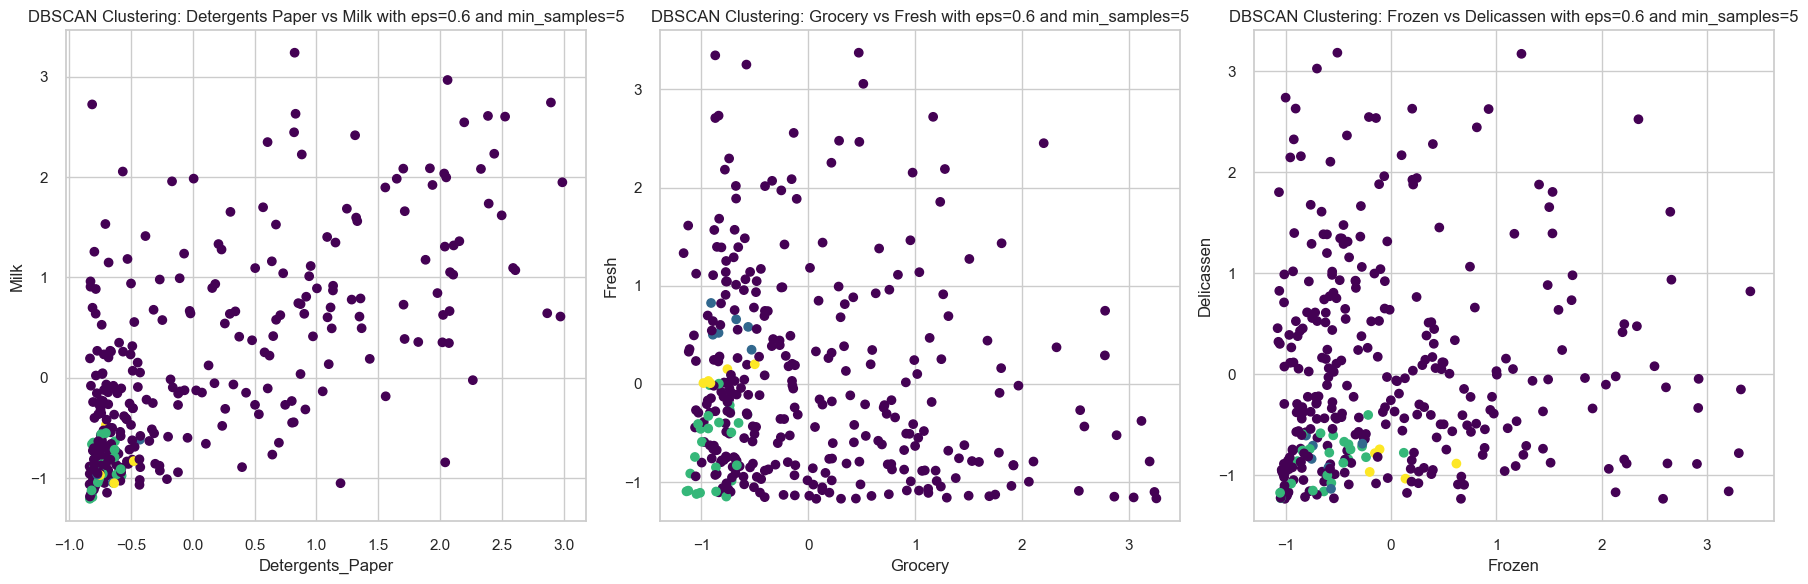

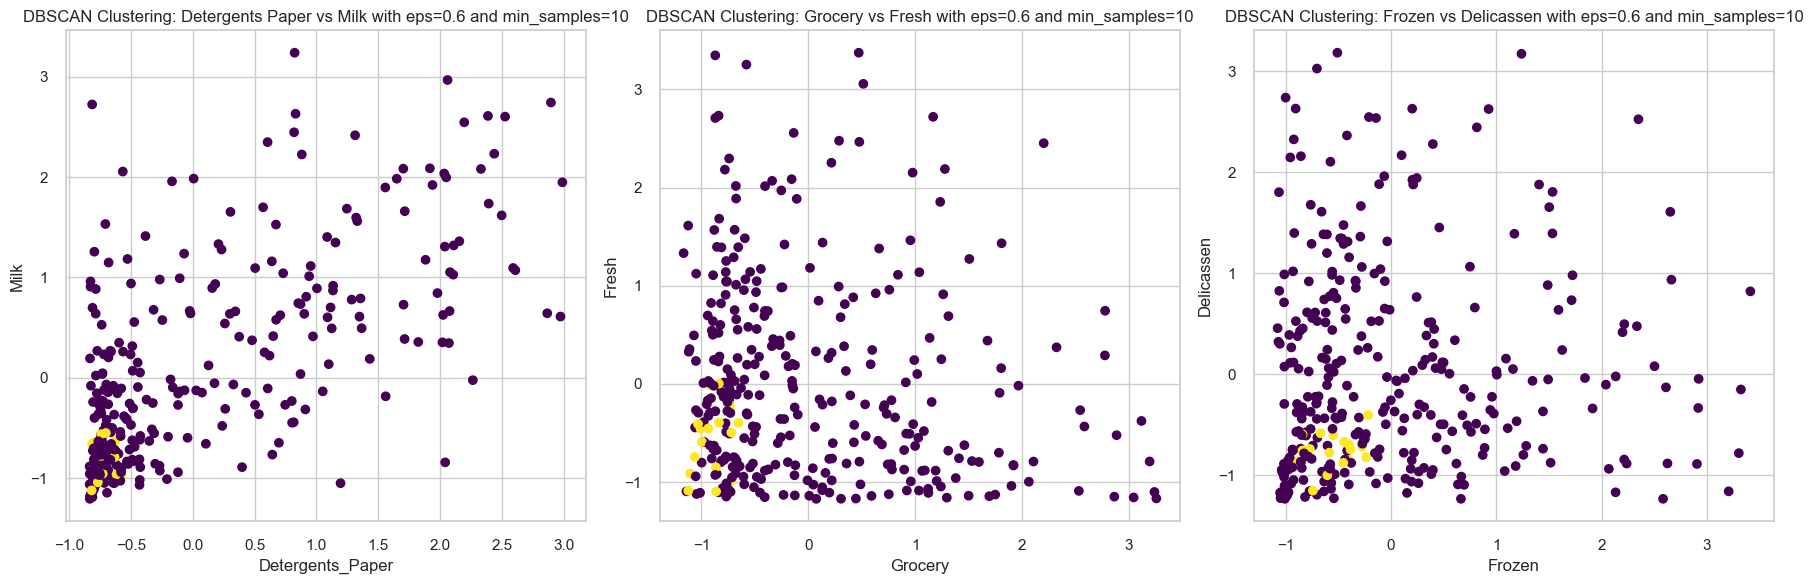

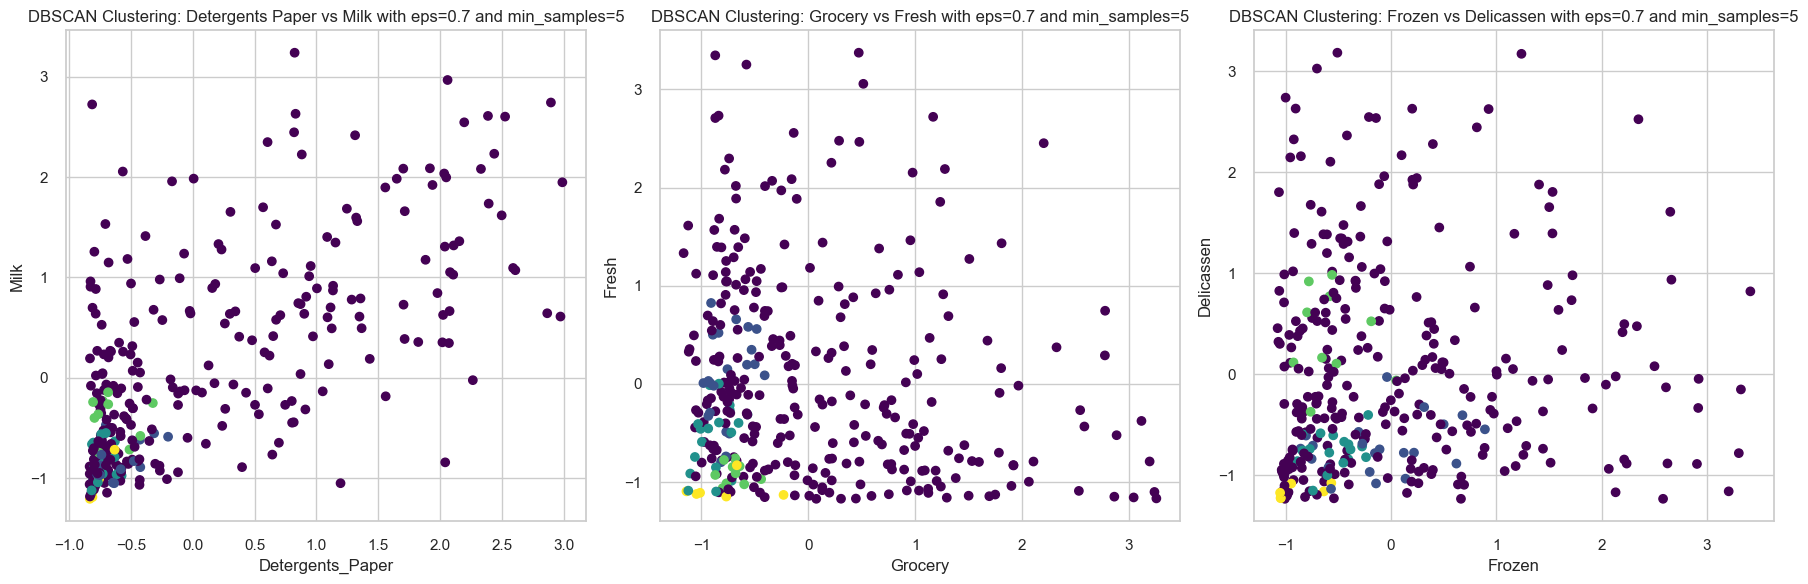

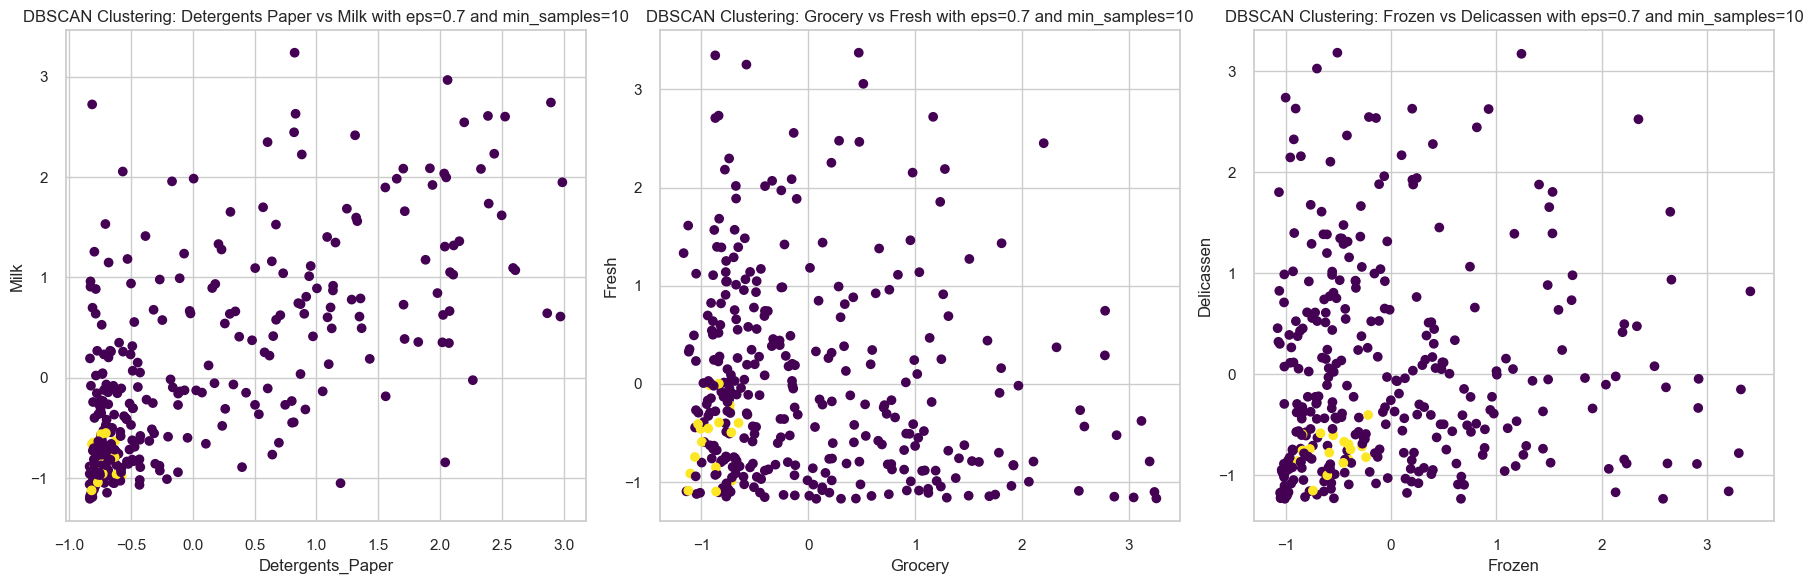

In [17]:
for eps in [0.6, 0.7]:
    for min_samples in [5, 10]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(customers_scale)
        customers_scale['Label_DBSCAN'] = dbscan.labels_
        
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        for i, (x_col, y_col, title) in enumerate(column_pairs):
            ax = axes[i]
            scatter = ax.scatter(customers_scale[x_col], customers_scale[y_col], c=customers_scale['Label_DBSCAN'], cmap=cmap)
            ax.set_title(f'DBSCAN Clustering: {title} with eps={eps} and min_samples={min_samples}')
            ax.set_xlabel(x_col)
            ax.set_ylabel(y_col)
        
        plt.tight_layout()
        plt.show()

**Your comment here**

- Idk why but DBSCAN keeps returning a very large amount of noise.